#  Linear Regression 

## 1. Necessary Imports 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 2. Read Dataset 

In [3]:
data=pd.read_csv("Weather.csv")

C:\Users\malik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data .head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


https://medium.com/swlh/using-linear-regression-to-predict-max-temperature-based-on-weather-conditions-2d776947cc2d

In [5]:
pd.set_option("display.max_columns",32)

In [6]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.shape

(119040, 31)

## 3. Handling Data Quality Problems

### A) Handling Missing Values

In [8]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [9]:
df1 = data.dropna(thresh=0.90*len(data), axis=1)
# Drop all those columns having more than 5 % missing values 


In [10]:
df1

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF
0,10001,1942-7-1,1.016,25.555556,22.222222,23.888889,0,42,7,1,0.04,78.0,72.0,75.0,0
1,10001,1942-7-2,0,28.888889,21.666667,25.555556,0,42,7,2,0,84.0,71.0,78.0,0
2,10001,1942-7-3,2.54,26.111111,22.222222,24.444444,0,42,7,3,0.1,79.0,72.0,76.0,0
3,10001,1942-7-4,2.54,26.666667,22.222222,24.444444,0,42,7,4,0.1,80.0,72.0,76.0,0
4,10001,1942-7-5,0,26.666667,21.666667,24.444444,0,42,7,5,0,80.0,71.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,28.333333,18.333333,23.333333,0,45,12,27,0,83.0,65.0,74.0,0
119036,82506,1945-12-28,9.906,29.444444,18.333333,23.888889,0,45,12,28,0.39,85.0,65.0,75.0,0
119037,82506,1945-12-29,0,28.333333,18.333333,23.333333,0,45,12,29,0,83.0,65.0,74.0,0
119038,82506,1945-12-30,0,28.333333,18.333333,23.333333,0,45,12,30,0,83.0,65.0,74.0,0


In [11]:
df1.isnull().sum()

STA            0
Date           0
Precip         0
MaxTemp        0
MinTemp        0
MeanTemp       0
Snowfall    1163
YR             0
MO             0
DA             0
PRCP        1932
MAX          474
MIN          468
MEA          498
SNF         1163
dtype: int64

###  Checking Data Types 

In [12]:
df1.dtypes

STA           int64
Date         object
Precip       object
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall     object
YR            int64
MO            int64
DA            int64
PRCP         object
MAX         float64
MIN         float64
MEA         float64
SNF          object
dtype: object

In [13]:
df1['SNF'].value_counts()

0.0    86090
0      29600
0.2      527
0.3      319
0.1      317
0.4      195
0.5       90
0.8       83
0.7       78
0.6       70
0.9       69
1         68
T         44
1.1       40
1.2       31
1.8       25
2         24
0.1       22
1.9       22
1.4       20
1.3       15
2.4       13
2.6       11
0.3       11
1.5       11
1.7       10
0.4       10
2.1       10
0.2        7
2.5        7
1.6        6
2.2        6
2.3        5
3          5
0.6        4
3.2        4
0.5        2
3.1        2
2.7        1
3.3        1
2.9        1
3.4        1
Name: SNF, dtype: int64

In [14]:
for col in ['Snowfall','PRCP','SNF','Precip']:
    df1[col]=pd.to_numeric(df1[col],errors='coerce')
    
                

C:\Users\malik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df1.dtypes

STA           int64
Date         object
Precip      float64
MaxTemp     float64
MinTemp     float64
MeanTemp    float64
Snowfall    float64
YR            int64
MO            int64
DA            int64
PRCP        float64
MAX         float64
MIN         float64
MEA         float64
SNF         float64
dtype: object

In [16]:
df1.isnull().sum()

STA             0
Date            0
Precip      16753
MaxTemp         0
MinTemp         0
MeanTemp        0
Snowfall     1207
YR              0
MO              0
DA              0
PRCP        18685
MAX           474
MIN           468
MEA           498
SNF          1207
dtype: int64

In [17]:
df1=df1.dropna()

In [18]:
# Replacing with MCT
#for column in ['Snowfall','SNF','MAX','MIN','MEA','Precip','PRCP']:
    #df1[column].fillna(df1[column].mean(), inplace=True)

In [19]:
df1.isnull().sum()

STA         0
Date        0
Precip      0
MaxTemp     0
MinTemp     0
MeanTemp    0
Snowfall    0
YR          0
MO          0
DA          0
PRCP        0
MAX         0
MIN         0
MEA         0
SNF         0
dtype: int64

In [20]:
df1.shape

(99223, 15)

### C) Delete Unnecessary Columns based on Domain Knowledge / Rearrange the Target Column

In [21]:
del_list=['STA','Date','YR','DA']
for col in df1.columns:
     if col in del_list:
            del df1[col]

In [22]:
df1.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,MO,PRCP,MAX,MIN,MEA,SNF
0,1.016,25.555556,22.222222,23.888889,0.0,7,0.04,78.0,72.0,75.0,0.0
1,0.000,28.888889,21.666667,25.555556,0.0,7,0.00,84.0,71.0,78.0,0.0
2,2.540,26.111111,22.222222,24.444444,0.0,7,0.10,79.0,72.0,76.0,0.0
3,2.540,26.666667,22.222222,24.444444,0.0,7,0.10,80.0,72.0,76.0,0.0
4,0.000,26.666667,21.666667,24.444444,0.0,7,0.00,80.0,71.0,76.0,0.0


In [23]:
df1['Target']=df1['MAX']
del df1['MAX']
df1.head()

C:\Users\malik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,MO,PRCP,MIN,MEA,SNF,Target
0,1.016,25.555556,22.222222,23.888889,0.0,7,0.04,72.0,75.0,0.0,78.0
1,0.000,28.888889,21.666667,25.555556,0.0,7,0.00,71.0,78.0,0.0,84.0
2,2.540,26.111111,22.222222,24.444444,0.0,7,0.10,72.0,76.0,0.0,79.0
3,2.540,26.666667,22.222222,24.444444,0.0,7,0.10,72.0,76.0,0.0,80.0
4,0.000,26.666667,21.666667,24.444444,0.0,7,0.00,71.0,76.0,0.0,80.0


## C) Handling Outliers

In [24]:
def show_boxplots(df): 
    cols=df.columns

    #  Categorical Data
    a = 4  # number of rows
    b = 4  # number of columns
    c = 1  # initialize plot counter

    fig = plt.figure(figsize=(30,20))

    for i in cols:
        plt.subplot(a, b, c)
        plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(df[i])
        c = c + 1

    plt.show()

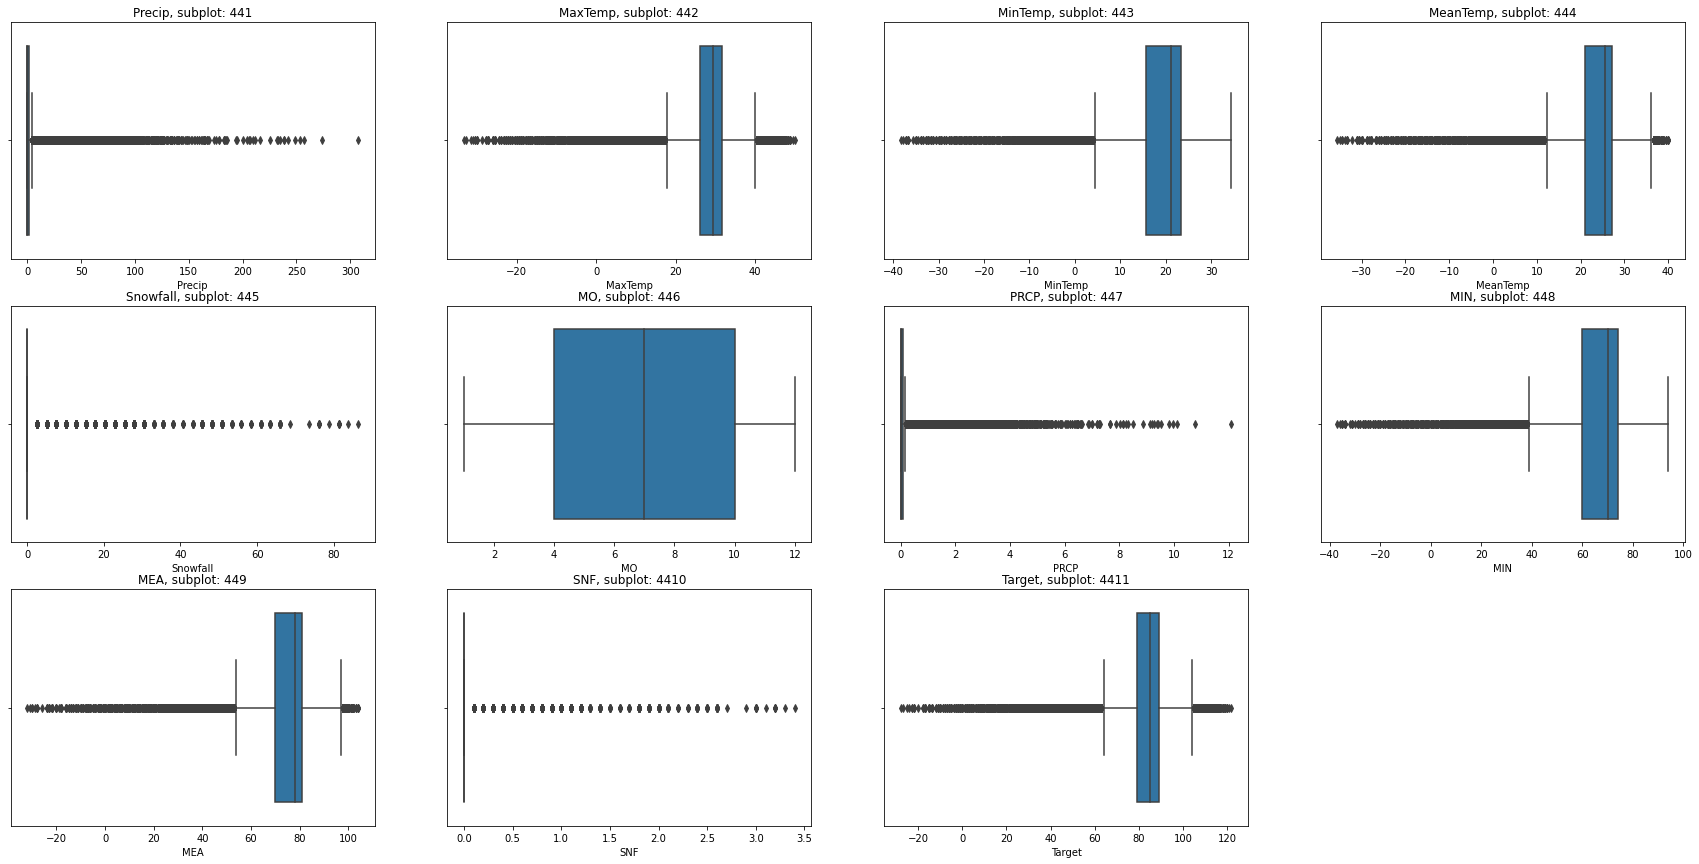

In [25]:
show_boxplots(df1)

In [26]:
exclude_list=['Snowfall','SNF','PRCP','Precip']
def handle_outliers(df):
    for col in df1.columns:
        if col not in exclude_list:
            Q1=df[col].quantile(0.25)
            Q3=df[col].quantile(0.75)
            IQR=Q3-Q1
            df[col] = np.where(df[col] <(Q1-1.5*IQR),Q1-1.5*IQR ,df[col])
            df[col] = np.where(df[col]>(Q3+1.5*IQR),Q3+1.5*IQR ,df[col])
        

In [27]:
handle_outliers(df1)

C:\Users\malik\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\malik\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


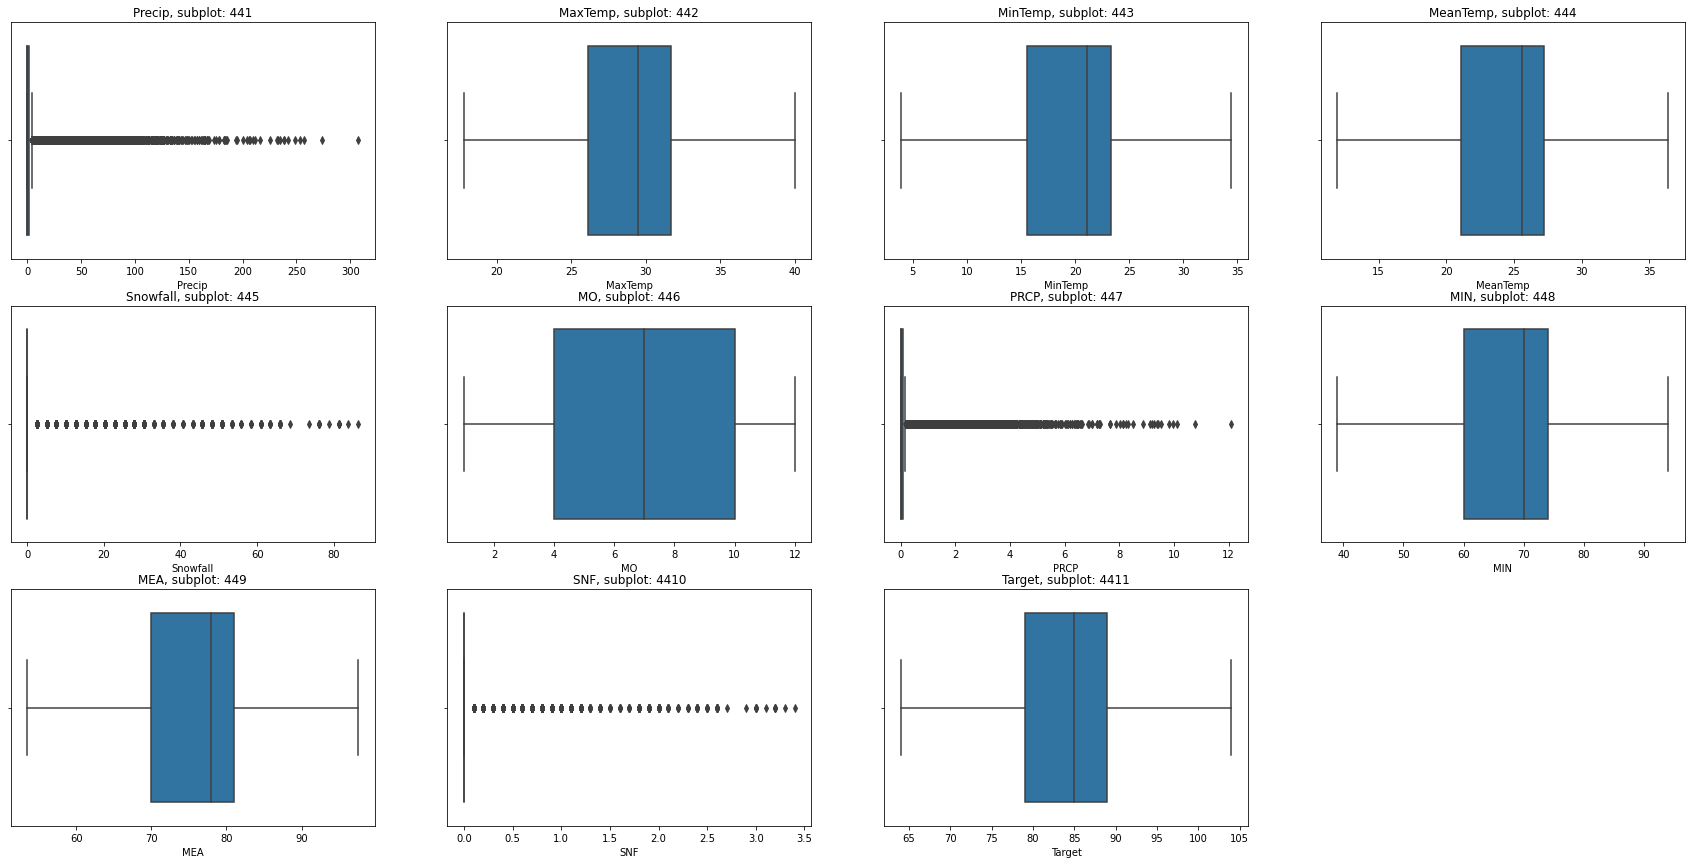

In [28]:
show_boxplots(df1)

In [29]:
df1.head()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,MO,PRCP,MIN,MEA,SNF,Target
0,1.016,25.555556,22.222222,23.888889,0.0,7.0,0.04,72.0,75.0,0.0,78.0
1,0.000,28.888889,21.666667,25.555556,0.0,7.0,0.00,71.0,78.0,0.0,84.0
2,2.540,26.111111,22.222222,24.444444,0.0,7.0,0.10,72.0,76.0,0.0,79.0
3,2.540,26.666667,22.222222,24.444444,0.0,7.0,0.10,72.0,76.0,0.0,80.0
4,0.000,26.666667,21.666667,24.444444,0.0,7.0,0.00,71.0,76.0,0.0,80.0


## 4. Removing Redundant or Multicollinear Features 

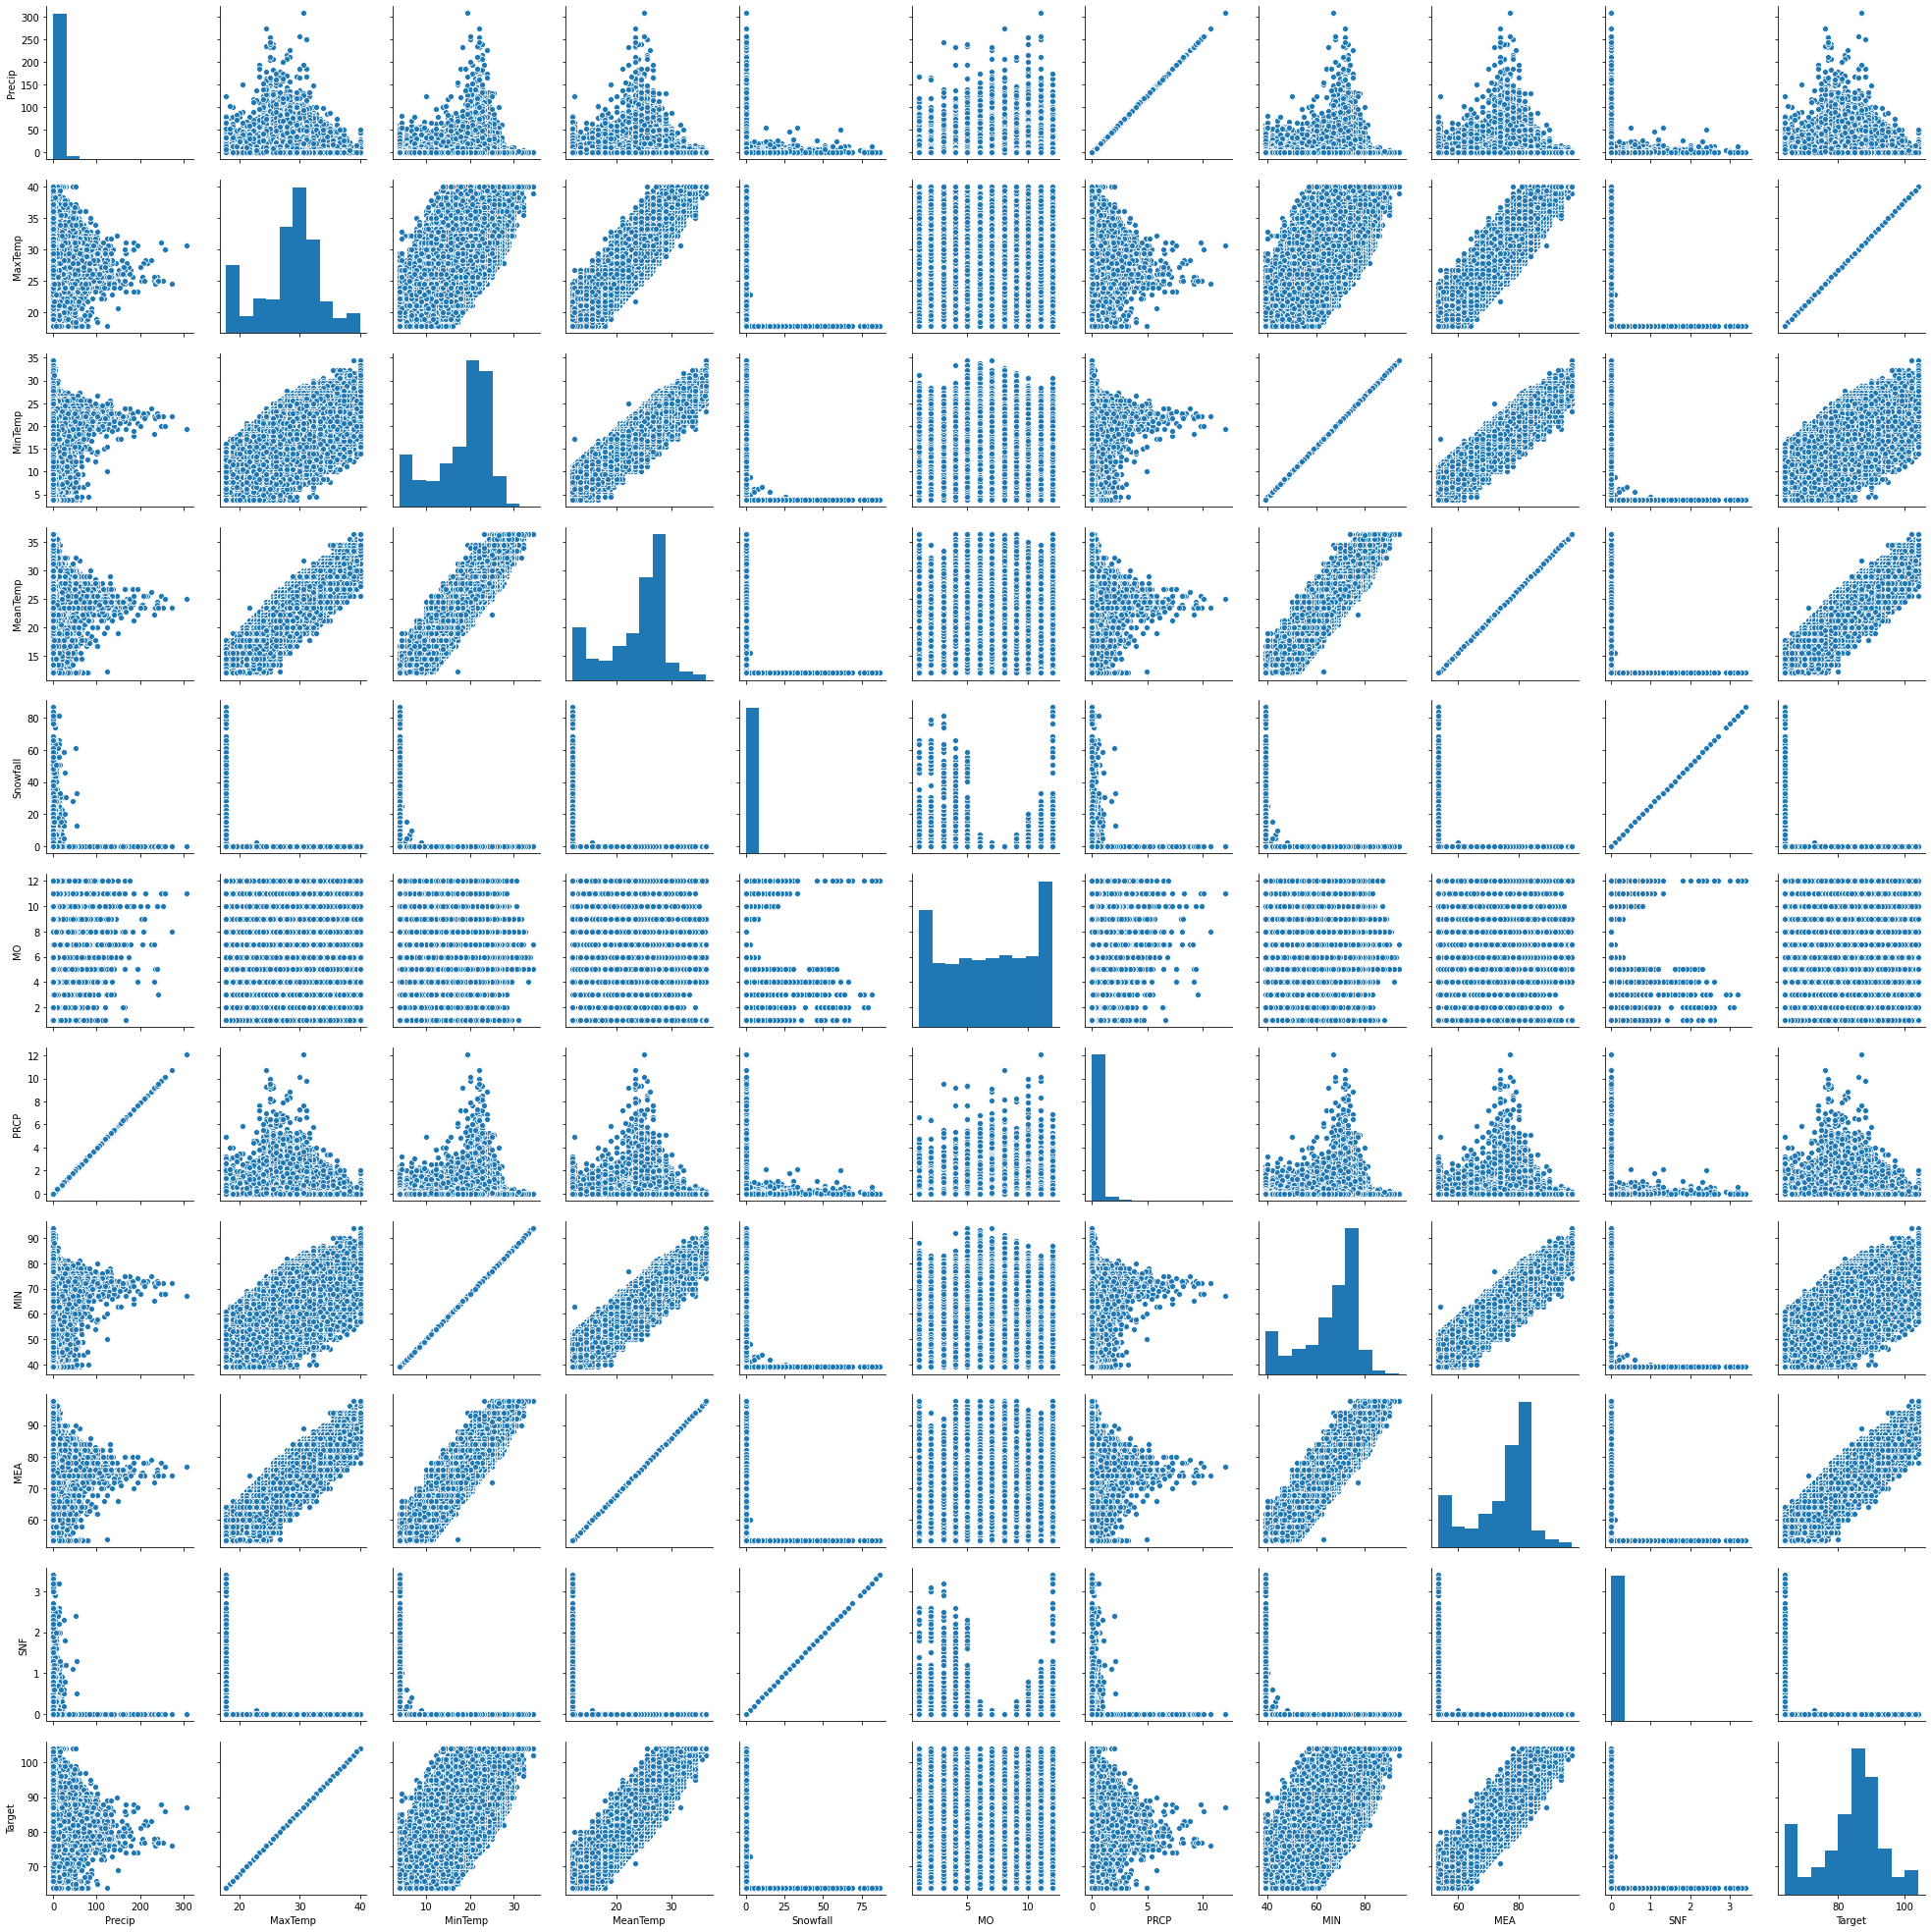

In [30]:
sns.pairplot(data = df1)

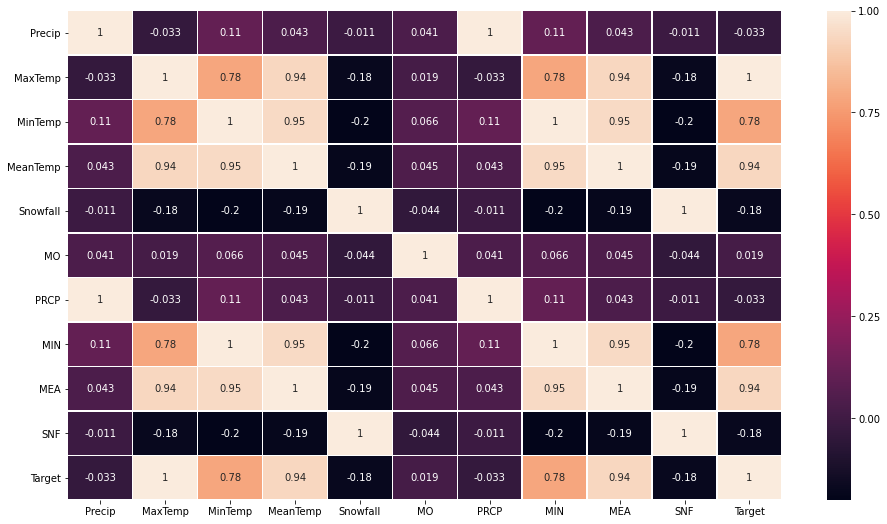

In [31]:
f,ax = plt.subplots(figsize=(16, 9))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)

In [32]:
df1.corr()

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,MO,PRCP,MIN,MEA,SNF,Target
Precip,1.000000,-0.032665,0.106517,0.042571,-0.010888,0.041184,1.000000,0.106517,0.042571,-0.010888,-0.032665
MaxTemp,-0.032665,1.000000,0.784299,0.935945,-0.176565,0.019010,-0.032665,0.784299,0.935945,-0.176565,1.000000
MinTemp,0.106517,0.784299,1.000000,0.947300,-0.201141,0.065944,0.106517,1.000000,0.947300,-0.201141,0.784299
MeanTemp,0.042571,0.935945,0.947300,1.000000,-0.187011,0.044507,0.042571,0.947300,1.000000,-0.187011,0.935945
Snowfall,-0.010888,-0.176565,-0.201141,-0.187011,1.000000,-0.043524,-0.010888,-0.201141,-0.187011,1.000000,-0.176565
MO,0.041184,0.019010,0.065944,0.044507,-0.043524,1.000000,0.041184,0.065944,0.044507,-0.043524,0.019010
PRCP,1.000000,-0.032665,0.106517,0.042571,-0.010888,0.041184,1.000000,0.106517,0.042571,-0.010888,-0.032665
MIN,0.106517,0.784299,1.000000,0.947300,-0.201141,0.065944,0.106517,1.000000,0.947300,-0.201141,0.784299
MEA,0.042571,0.935945,0.947300,1.000000,-0.187011,0.044507,0.042571,0.947300,1.000000,-0.187011,0.935945
SNF,-0.010888,-0.176565,-0.201141,-0.187011,1.000000,-0.043524,-0.010888,-0.201141,-0.187011,1.000000,-0.176565


In [33]:
delete_col_list =['MaxTemp', 'MinTemp','MeanTemp','Snowfall','Precip']
for col in df1.columns:
    if col in delete_col_list:
        del df1[col]

In [34]:
df1.head()

,MO,PRCP,MIN,MEA,SNF,Target
0,7.0,0.04,72.0,75.0,0.0,78.0
1,7.0,0.00,71.0,78.0,0.0,84.0
2,7.0,0.10,72.0,76.0,0.0,79.0
3,7.0,0.10,72.0,76.0,0.0,80.0
4,7.0,0.00,71.0,76.0,0.0,80.0


## Selected Features Description : 
 

1. Month of Observation
2. Precipitation
3. Minumum Temperature
4. Mean Temperature
5. Snowfll
6. Target (Max Temperature) 
    

## 5. Train-Test Split 

In [35]:
Y=df1['Target'].values

In [36]:
Y

array([78., 84., 79., ..., 83., 83., 85.])

In [37]:
del df1['Target']

In [38]:
X=df1.values

In [39]:
X

array([[7.0e+00, 4.0e-02, 7.2e+01, 7.5e+01, 0.0e+00],
       [7.0e+00, 0.0e+00, 7.1e+01, 7.8e+01, 0.0e+00],
       [7.0e+00, 1.0e-01, 7.2e+01, 7.6e+01, 0.0e+00],
       ...,
       [1.2e+01, 0.0e+00, 6.5e+01, 7.4e+01, 0.0e+00],
       [1.2e+01, 0.0e+00, 6.5e+01, 7.4e+01, 0.0e+00],
       [1.2e+01, 0.0e+00, 6.3e+01, 7.4e+01, 0.0e+00]])

In [40]:
Y.shape

(99223,)

In [41]:
X.shape

(99223, 5)

In [42]:
type(Y)

numpy.ndarray

In [43]:
type(X)

numpy.ndarray

In [44]:
Y=np.array(Y)

In [45]:
Y

array([78., 84., 79., ..., 83., 83., 85.])

In [46]:
Y.shape

(99223,)

In [47]:
X.shape

(99223, 5)

In [48]:
Y = Y.reshape(-1,1)

In [49]:
Y

array([[78.],
       [84.],
       [79.],
       ...,
       [83.],
       [83.],
       [85.]])

In [50]:
xtrain , xtest , ytrain, ytest =train_test_split(X,Y,test_size=0.2,random_state=42 )

In [51]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (79378, 5)
xtest shape  :  (19845, 5)
ytrain shape :  (79378, 1)
ytest shape  :  (19845, 1)


## 6. Fitting Linear Regression Model 

In [52]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
model=regressor.fit(xtrain, ytrain) 
   
# predicting the test set results 
y_pred = regressor.predict(xtest) 

In [53]:
y_pred

array([[ 86.9415952 ],
       [ 90.41352963],
       [ 85.08893128],
       ...,
       [106.61014015],
       [ 87.59032844],
       [ 84.44276062]])

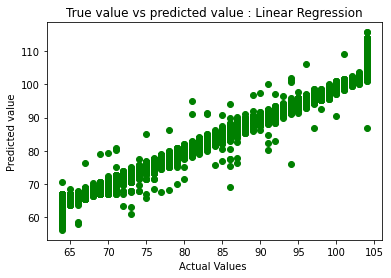

In [54]:
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Actual Values ") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

In [55]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 0.9709932771152636
Mean Squared Error: 2.074208521819565
Root Mean Squared Error: 1.4402112767991941


In [56]:
regressor.coef_

array([[ 1.28129055e-03, -1.29778470e-01, -8.33799052e-01,
         1.83042206e+00, -2.55322832e+00]])

In [57]:
model.score(xtrain,ytrain)

0.9788235665620092

In [58]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten().round(2)})

In [59]:
df

,Actual,Predicted
0,88.0,86.94
1,90.0,90.41
2,86.0,85.09
3,66.0,66.32
4,90.0,89.08
...,...,...
19840,64.0,66.91
19841,64.0,66.92
19842,104.0,106.61
19843,87.0,87.59


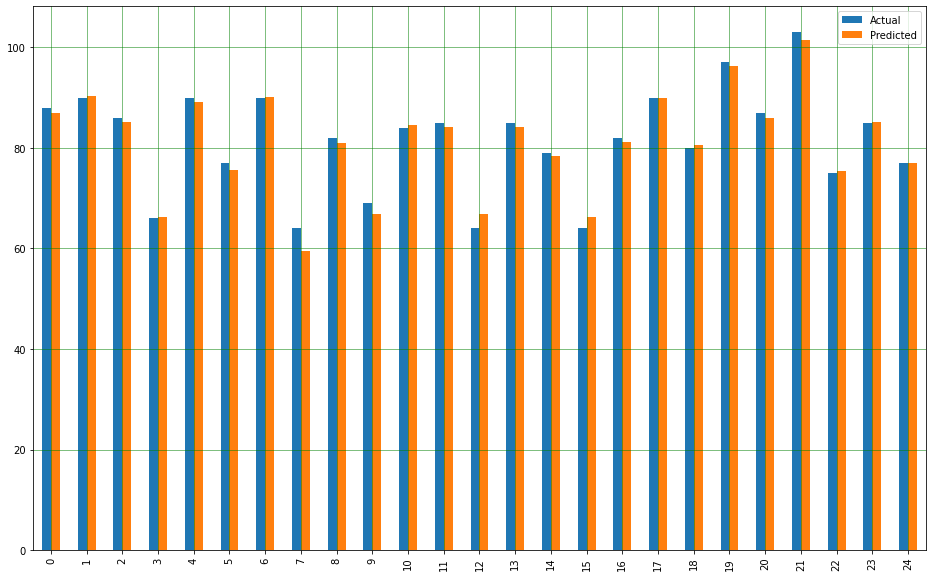

In [60]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 7. Fitting A Random Forest Regressor 

In [61]:
from sklearn.ensemble import RandomForestRegressor# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)# Train the model on training data
rf.fit(xtrain , ytrain )

C:\Users\malik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [62]:
y_pred = rf.predict(xtest) 

In [63]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 0.5631418875239016
Mean Squared Error: 0.849337144370499
Root Mean Squared Error: 0.9215948916799067


In [64]:
rf.score(xtrain,ytrain)

0.9951642132860247

In [65]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten().round(2)})

In [66]:
df.head()

,Actual,Predicted
0,88.0,88.00
1,90.0,90.94
2,86.0,85.27
3,66.0,66.18
4,90.0,88.82


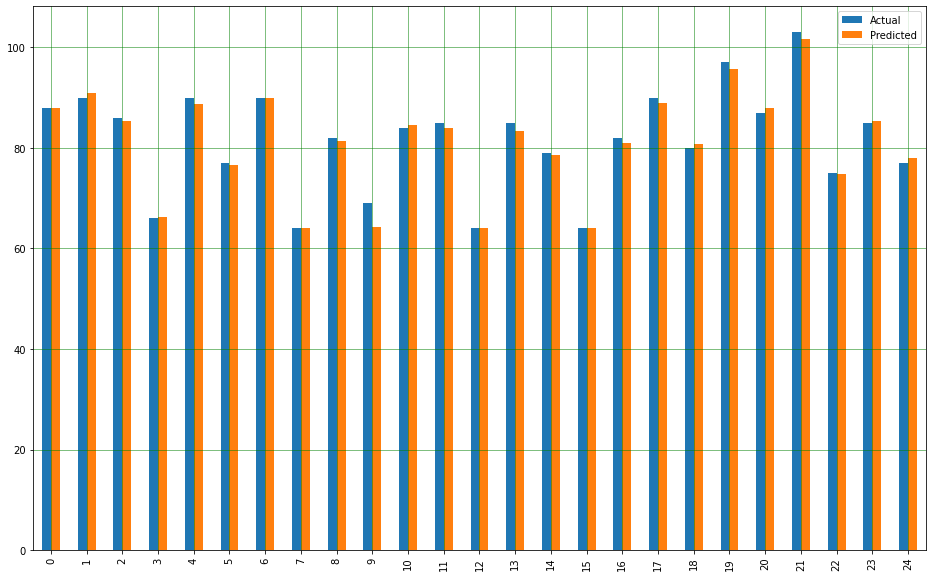

In [67]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## 8. Fitting an SVM Regressor 

In [452]:
from sklearn.svm import SVR
regressor = SVR(kernel='linear')
model=regressor.fit(xtrain,ytrain)
y_pred = regressor.predict(xtest)

C:\Users\malik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [430]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 0.8943044233300647
Mean Squared Error: 2.3907153618066674
Root Mean Squared Error: 1.5461938306068446


In [431]:
regressor.score(xtrain,ytrain)

0.9758879542988792

In [432]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten()})

In [433]:
df.head(5)

,Actual,Predicted
0,88.0,87.769079
1,90.0,90.892881
2,86.0,85.044713
3,66.0,66.044669
4,90.0,89.059134


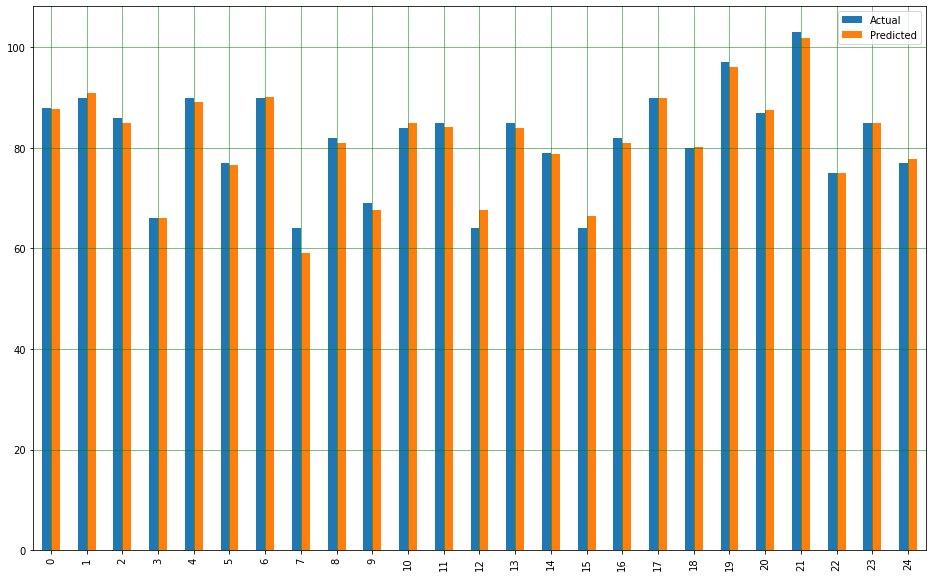

In [434]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
print model.intercept_, model.coef_, mse, 
print(model.score(dataset.data, dataset.target))

## 9. Fitting an OLS Model from statsmodels.api Library 

In [68]:
import statsmodels.api as sm
ols_model = sm.OLS(ytrain,xtrain)
ols_results = ols_model.fit()

C:\Users\malik\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

Mean Absolute Error: 0.5631418875239016
Mean Squared Error: 0.849337144370499
Root Mean Squared Error: 0.9215948916799067


In [70]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.534e+07
Date:                Fri, 12 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:22:26   Log-Likelihood:            -1.4041e+05
No. Observations:               79378   AIC:                         2.808e+05
Df Residuals:                   79373   BIC:                         2.809e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0116      0.001      8.043      0.000       0.009       0.014
x2            -0.0938      0.011     -8.493      0.000      -0.115      -0.072
x3            -0.8570      0.001   -718.982      0.000      -0.859      -0.855
x4             1.8698      0.001   1755.757      0.000       1.868       1.872
x5            -2.3325      0.050    -46.233      0.000      -2.431      -2.234
==============================================================================
Omnibus:                    19943.633   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           883096.529
Skew:                          -0.434   Prob(JB):                         0.00
Kurtosis:                      19.317   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': y_pred.flatten().round(2)})

In [72]:
df.head()

,Actual,Predicted
0,88.0,88.00
1,90.0,90.94
2,86.0,85.27
3,66.0,66.18
4,90.0,88.82


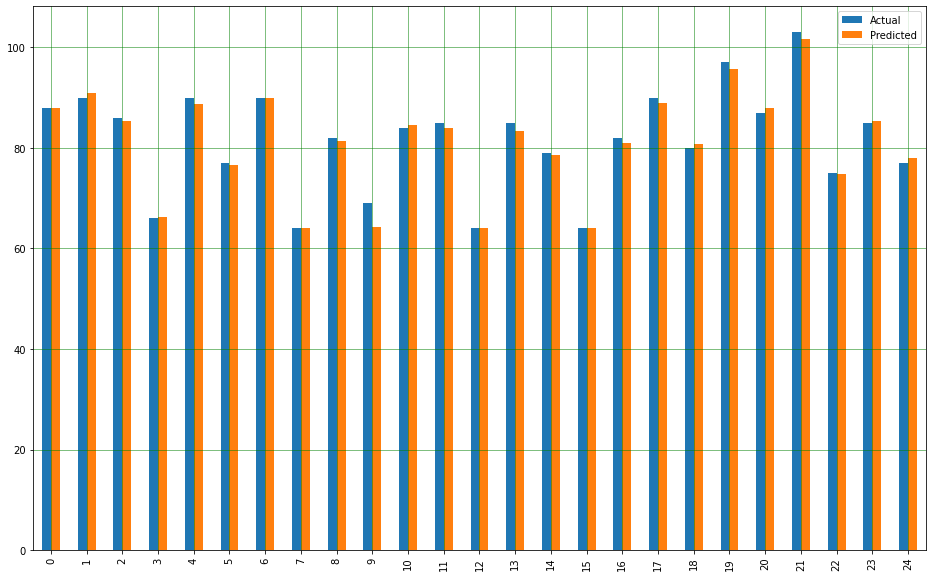

In [73]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()